<a href="https://colab.research.google.com/github/shubhamshinde3/DL_collab/blob/main/DL_Lab_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Dataset/Boston.csv")

**From Scratch**

In [4]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df1=df.drop('Unnamed: 0', axis=1)

In [6]:
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [8]:
#p = df1.iloc[:12].values
# step-1: Seperating the features set and the target array
p =df1['rm'].values

In [9]:
q = df1['medv'].values

In [10]:
import numpy as np
def coeff(x, y):
  c = 0.0
  v = 0.0
  for i in range(np.size(x)):
    c = +(x[i] - np.mean(x)) * (y[i] - np.mean(y))
    v = +pow((x[i] - np.mean(x)), 2)
  print("slope:",c,"\n","intercept:", v)
  b1 = c/v
  b0 = np.mean(y) - b1 * np.mean(x)
  return b0 , b1


In [11]:
b0 , b1 = coeff(p,q)

slope: 2.7074781241700374 
 intercept: 0.06483867122201556


In [12]:
# The line for simple linear regression
y1 = b0 + b1 * p
y1

array([ 3.46576468e+01,  2.82270457e+01,  6.01295083e+01,  5.23209213e+01,
        5.85427366e+01,  2.86028600e+01,  1.11483713e+01,  1.78295153e+01,
       -4.76110288e+00,  1.08143141e+01,  2.63897311e+01,  1.10230998e+01,
        6.01224184e+00,  8.51767084e+00,  1.46559719e+01,  3.71559859e+00,
        7.93307074e+00,  1.02297140e+01, -1.20686041e+01, -7.52416469e-01,
       -7.30828903e+00,  9.18578525e+00,  1.65768008e+01,  2.83869844e+00,
        7.47374209e+00, -6.09733168e+00,  2.83869844e+00,  1.26098716e+01,
        3.13170748e+01,  3.87916046e+01, -1.33701657e+00,  1.36538003e+01,
        8.55942799e+00, -1.83810237e+00,  1.46559719e+01,  7.84955644e+00,
        4.00789864e+00,  4.38371299e+00,  9.22754240e+00,  3.54927898e+01,
        5.34066072e+01,  4.28002910e+01,  1.77042439e+01,  1.94580442e+01,
        1.35285289e+01, -2.63148822e+00,  1.71125538e+00,  1.19000000e+01,
       -1.44487617e+01, -5.97206023e+00,  9.10227095e+00,  1.54493578e+01,
        3.19851892e+01,  

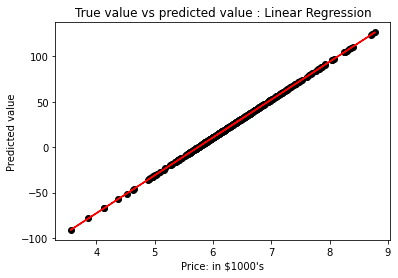

In [13]:
import matplotlib.pyplot as plt
plt.scatter(p, y1, c = 'black')
plt.plot(p,y1 , c='red')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(q, y1)
mae = mean_absolute_error(q,y1)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  568.9869370749915
Mean Absolute Error :  17.470275646029343


**Using Sklearn library**

In [15]:
df1=df.drop('Unnamed: 0', axis=1)

In [16]:
df1.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
x = df1[['crim',	'zn',	'indus',	'chas',	'nox',	'rm',	'age',	'dis',	'rad',	'tax',	'ptratio',	'black'	,'lstat']]

In [18]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [19]:
y = df1['medv']

In [20]:
from sklearn.model_selection import train_test_split
 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0)
  
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [21]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(xtrain, ytrain)
  
y_pred = LR.predict(xtest)

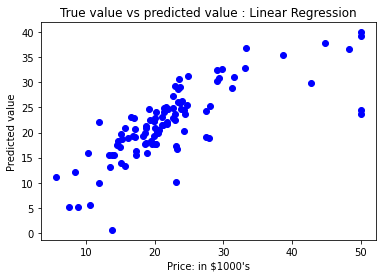

In [24]:
import matplotlib.pyplot as plt
plt.scatter(ytest, y_pred, c = 'blue')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  33.44897999767638
Mean Absolute Error :  3.8429092204444997
